In [140]:
# import library pandas
import pandas as pd

# Import library numpy
import numpy as np

# Import library matplotlib untuk visualisasi
import matplotlib.pyplot as plt

import seaborn as sns

import plotly.graph_objects as go

# import library for build model 
from tensorflow.python.keras.layers import Dense,Dropout,SimpleRNN,LSTM
from tensorflow.python.keras.models import Sequential

# import library untuk data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [141]:
#Panggil file (load file bernama Stock.csv) dan simpan dalam dataframe
dataset ="data covid 19 INA.csv"
data = pd.read_csv(dataset,parse_dates=['tanggal'])

# tampilkan 5 baris data 
data.head(50)

,tanggal,Kasus harian,Kasus Impor,Kasus Lokal,Total kasus,Kasus aktif,% kasus aktif,Sembuh (baru),Sembuh,Tingkat kesembuhan (seluruh kasus),...,Jumlah org yg dites / positif,Jumlah Test/Positif harian,Positif / Jumlah Tes,Positive rate harian,Case Growth Rate,Tingkat positivitas mingguan,Jumlah spesimen diperiksa (rata-rata 7 hari),Jumlah orang diperiksa (rata-rata 7 hari),Rasio spesimen/orang diperiksa (rata-rata 7 hari),Unnamed: 41
0,5-Mar,0,0.0,0.0,2,2,100.00%,0,0,0.00%,...,194.00,#VALUE!,0.52%,#VALUE!,#VALUE!,NaN,NaN,NaN,NaN,NaN
1,6-Mar,2,0.0,2.0,4,4,100.00%,0,0,0.00%,...,112.50,31,0.89%,3.77%,100.00%,NaN,NaN,NaN,NaN,NaN
2,7-Mar,0,0.0,0.0,4,4,100.00%,0,0,0.00%,...,113.50,#DIV/0!,0.88%,0.00%,0.00%,NaN,NaN,NaN,NaN,NaN
3,8-Mar,2,1.0,1.0,6,6,100.00%,0,0,0.00%,...,80.50,14.5,1.24%,8.00%,50.00%,NaN,NaN,NaN,NaN,NaN
4,9-Mar,13,7.0,6.0,19,19,100.00%,0,0,0.00%,...,28.58,4.62,3.50%,23.64%,216.67%,NaN,NaN,NaN,NaN,NaN
5,10-Mar,8,5.0,3.0,27,27,100.00%,0,0,0.00%,...,25.70,18.88,3.89%,4.73%,42.11%,NaN,NaN,NaN,NaN,NaN
6,12-Mar,0,0.0,0.0,34,27,79.41%,1,3,8.82%,...,25.35,#DIV/0!,3.94%,#REF!,#REF!,NaN,NaN,NaN,NaN,NaN
7,13-Mar,35,NaN,NaN,69,60,86.96%,2,5,7.25%,...,14.57,4.09,6.87%,24.82%,102.94%,9.72%,NaN,NaN,NaN,NaN
8,14-Mar,27,NaN,NaN,96,83,86.46%,3,8,8.33%,...,12.55,7.41,7.97%,12.33%,39.13%,11.26%,NaN,NaN,NaN,NaN
9,15-Mar,21,NaN,NaN,117,104,88.89%,0,8,6.84%,...,11.05,4.19,9.05%,26.58%,21.88%,12.63%,NaN,NaN,NaN,NaN


In [5]:
data.columns

Index(['tanggal', 'Kasus harian', 'Kasus Impor', 'Kasus Lokal', 'Total kasus',
       'Kasus aktif', '% kasus aktif', 'Sembuh (baru)', 'Sembuh',
       'Tingkat kesembuhan (seluruh kasus)',
       'Tingkat kesembuhan (closed cases)', 'Meninggal (baru)',
       'Meninggal Dunia', 'Tingkat kematian (seluruh kasus)',
       'Tingkat kematian (closed cases)', 'PDP', 'ODP', 'Suspek aktif',
       'Jumlah spesimen diperiksa (dari 1 April)', 'Jumlah orang diperiksa',
       'Negatif', 'Positif \n(=C)', 'Dalam Proses', 'Spesimen',
       'Spesimen (PCR-TCM)', 'Spesimen (Antigen)', 'Orang yang dites',
       'Orang yang dites (PCR-TCM)', 'Orang yang dites (Antigen)',
       'Vaksinasi (ineligible)', 'Jumlah test/juta penduduk', 'Test/Positif',
       'Jumlah org yg dites / positif', 'Jumlah Test/Positif harian',
       'Positif / Jumlah Tes', 'Positive rate harian', 'Case Growth Rate',
       'Tingkat positivitas mingguan',
       'Jumlah spesimen diperiksa (rata-rata 7 hari)',
       'Jumlah o

In [4]:
data.tail()

,tanggal,Kasus harian,Kasus Impor,Kasus Lokal,Total kasus,Kasus aktif,% kasus aktif,Sembuh (baru),Sembuh,Tingkat kesembuhan (seluruh kasus),...,Jumlah org yg dites / positif,Jumlah Test/Positif harian,Positif / Jumlah Tes,Positive rate harian,Case Growth Rate,Tingkat positivitas mingguan,Jumlah spesimen diperiksa (rata-rata 7 hari),Jumlah orang diperiksa (rata-rata 7 hari),Rasio spesimen/orang diperiksa (rata-rata 7 hari),Unnamed: 41
82,27-May,686,NaN,NaN,23851,16321,68.43%,180,6057,25.40%,...,8.20,10.52,12.20%,9.51%,2.96%,11.27%,9504.0,5911.0,1.61,7054.0
83,28-May,687,NaN,NaN,24538,16802,68.47%,183,6240,25.43%,...,8.20,8.43,12.19%,11.86%,2.88%,10.69%,9990.0,5848.0,1.71,6627.0
84,29-May,678,NaN,NaN,25216,17204,68.23%,252,6492,25.75%,...,8.14,5.68,12.29%,17.59%,2.76%,12.21%,10173.0,5171.0,1.97,7536.0
85,30-May,557,NaN,NaN,25773,17185,66.68%,523,7015,27.22%,...,8.41,20.83,11.89%,4.80%,2.21%,9.89%,10309.0,5819.0,1.77,5987.0
86,31-May,700,NaN,NaN,26473,17552,66.30%,293,7308,27.61%,...,8.45,9.79,11.84%,10.21%,2.72%,9.60%,10689.0,6251.0,1.71,6035.0


In [5]:
data.describe()

,Kasus harian,Kasus Impor,Kasus Lokal,Total kasus,Kasus aktif,Sembuh (baru),Sembuh,Meninggal (baru),Meninggal Dunia,PDP,...,Orang yang dites (PCR-TCM),Orang yang dites (Antigen),Vaksinasi (ineligible),Jumlah test/juta penduduk,Test/Positif,Jumlah org yg dites / positif,Jumlah spesimen diperiksa (rata-rata 7 hari),Jumlah orang diperiksa (rata-rata 7 hari),Rasio spesimen/orang diperiksa (rata-rata 7 hari),Unnamed: 41
count,87.000000,7.000000,7.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,48.000000,...,0.0,0.0,0.0,80.000000,87.000000,87.000000,40.000000,40.000000,40.000000,14.000000
mean,304.183908,1.857143,1.714286,8311.172414,6076.310345,83.977011,1650.724138,18.517241,584.137931,19837.312500,...,NaN,NaN,NaN,252.687500,14.320805,13.000690,6121.200000,4061.500000,1.504000,7162.571429
std,224.117210,2.911390,2.214670,7983.637836,5475.734306,97.967363,2067.490079,14.821309,499.388747,8128.464575,...,NaN,NaN,NaN,245.590665,26.426516,26.656893,2173.731899,1242.117155,0.185608,795.101611
min,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,10482.000000,...,NaN,NaN,NaN,4.000000,4.020000,4.020000,2757.000000,1874.000000,1.100000,5987.000000
25%,107.500000,0.000000,0.000000,1100.500000,953.500000,5.500000,52.500000,8.000000,94.500000,12459.750000,...,NaN,NaN,NaN,27.750000,5.565000,5.565000,4537.750000,3569.500000,1.407500,6664.750000
50%,297.000000,0.000000,1.000000,6248.000000,5082.000000,46.000000,631.000000,15.000000,535.000000,18292.000000,...,NaN,NaN,NaN,173.000000,8.900000,7.150000,5858.000000,3957.000000,1.500000,7125.000000
75%,434.500000,3.000000,2.500000,13838.500000,10220.000000,134.000000,2652.500000,25.500000,966.000000,26539.000000,...,NaN,NaN,NaN,434.000000,11.045000,8.085000,6770.750000,4781.750000,1.622500,7609.500000
max,973.000000,7.000000,6.000000,26473.000000,17552.000000,523.000000,7308.000000,60.000000,1613.000000,35800.000000,...,NaN,NaN,NaN,828.000000,194.000000,194.000000,10689.000000,6251.000000,1.970000,8965.000000


In [6]:
data.isnull().sum()

tanggal                                               0
Kasus harian                                          0
Kasus Impor                                          80
Kasus Lokal                                          80
Total kasus                                           0
Kasus aktif                                           0
% kasus aktif                                         0
Sembuh (baru)                                         0
Sembuh                                                0
Tingkat kesembuhan (seluruh kasus)                    0
Tingkat kesembuhan (closed cases)                     6
Meninggal (baru)                                      0
Meninggal Dunia                                       0
Tingkat kematian (seluruh kasus)                      0
Tingkat kematian (closed cases)                       6
PDP                                                  39
ODP                                                  39
Suspek aktif                                    

Text(0.5, 0.98, 'Peningkatatan Kesembuhan covid-19 Indonesia')

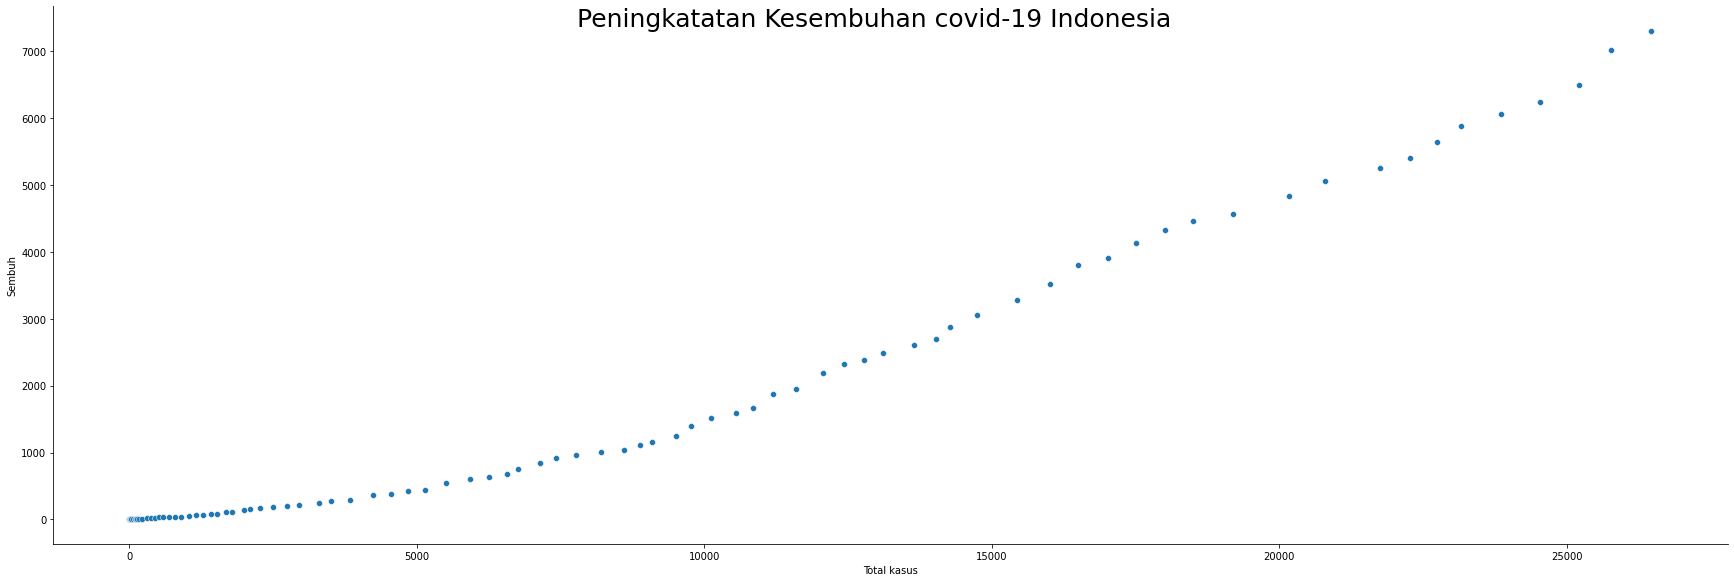

In [7]:
g = sns.relplot(x= "Total kasus", y ="Sembuh", data = data,
            height=8, # make the plot 5 units high
            aspect=3)
g.fig.suptitle('Peningkatatan Kesembuhan covid-19 Indonesia', fontsize=25)

Text(0.5, 0.98, 'Peningkatatan Kesembuhan covid-19 Indonesia Harian')

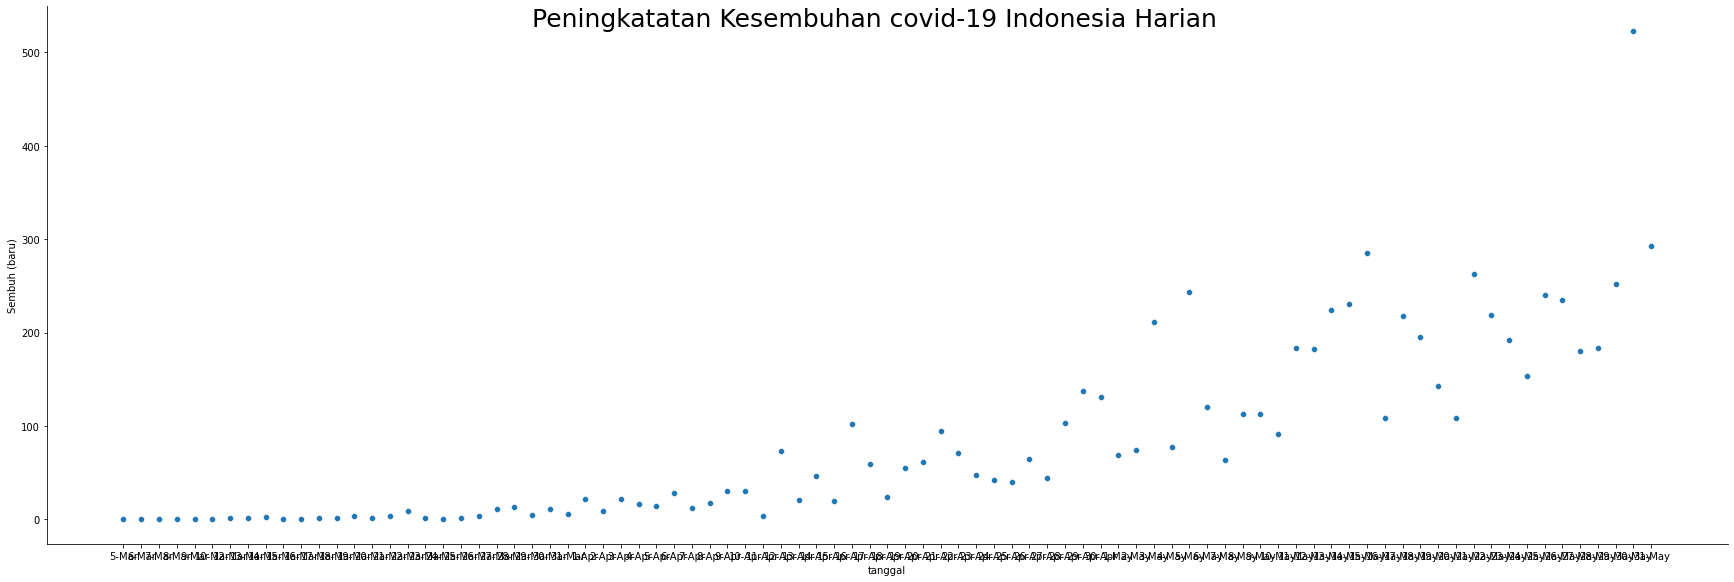

In [8]:
g = sns.relplot(x= "tanggal", y ="Sembuh (baru)", data = data,
            height=8, # make the plot 5 units high
            aspect=3)
g.fig.suptitle('Peningkatatan Kesembuhan covid-19 Indonesia Harian', fontsize=25)

Text(0.5, 0.98, 'Peningkatatan kematian covid-19 Indonesia Harian')

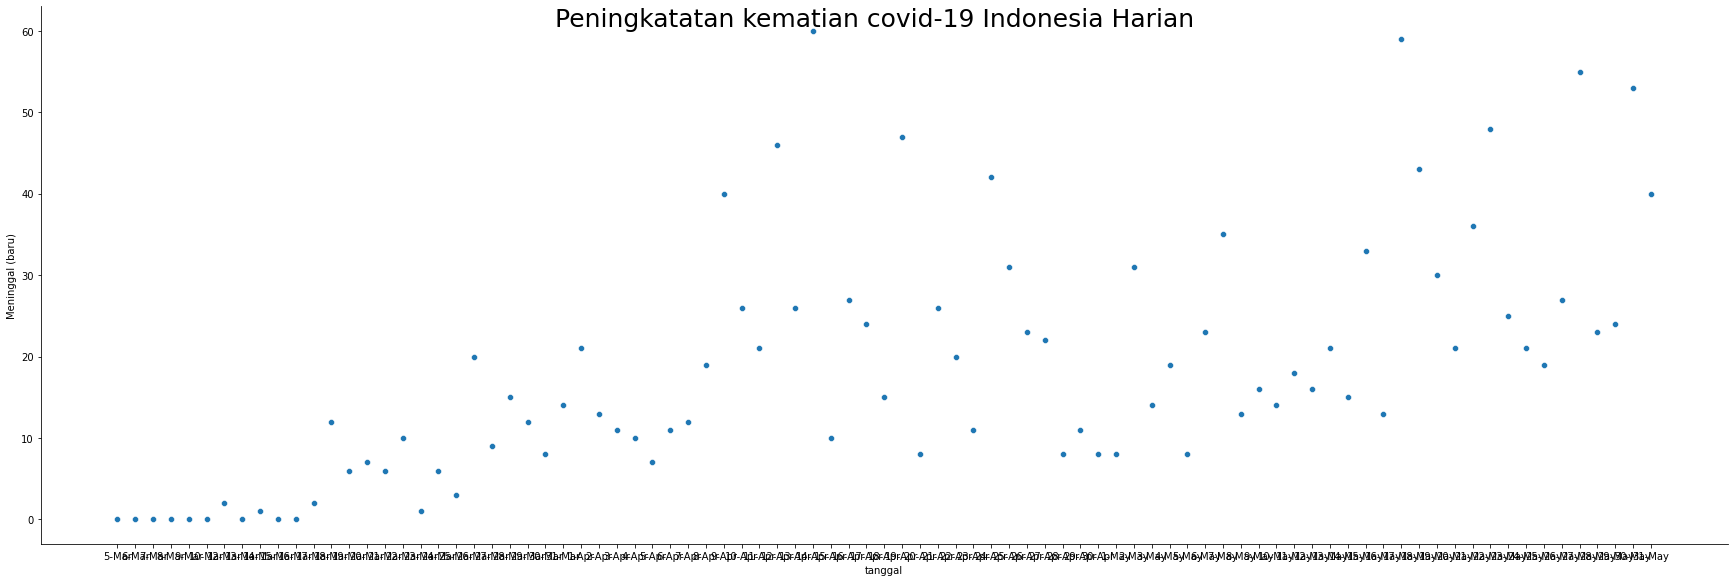

In [9]:
g = sns.relplot(x= "tanggal", y ="Meninggal (baru)", data = data,
            height=8, # make the plot 5 units high
            aspect=3)
g.fig.suptitle('Peningkatatan kematian covid-19 Indonesia Harian', fontsize=25)

Text(0.5, 0.98, 'Peningkatatan Meninggal Dunia covid-19 Indonesia')

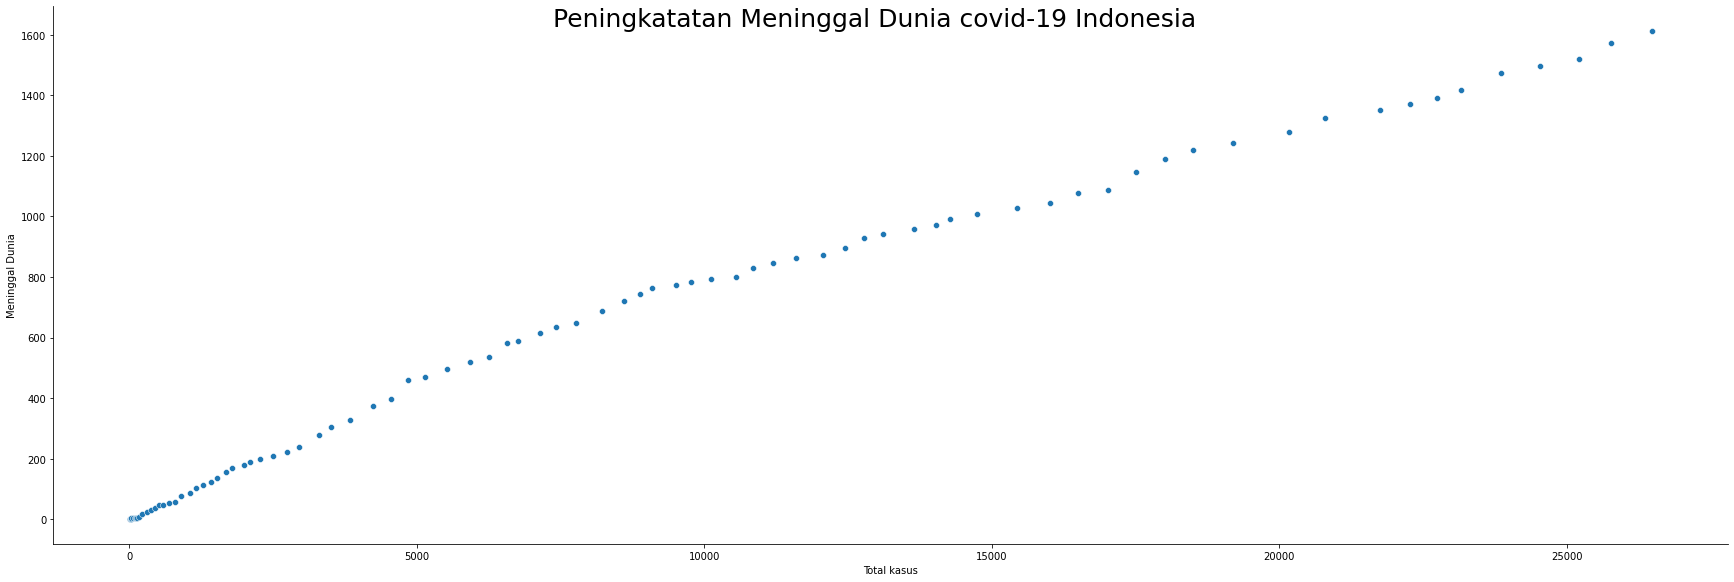

In [10]:
g = sns.relplot(x= "Total kasus", y ="Meninggal Dunia", data = data,
            height=8, # make the plot 5 units high
            aspect=3)
g.fig.suptitle('Peningkatatan Meninggal Dunia covid-19 Indonesia', fontsize=25)

Text(0.5, 0.98, 'Peningkatatan Positif covid-19 Indonesia')

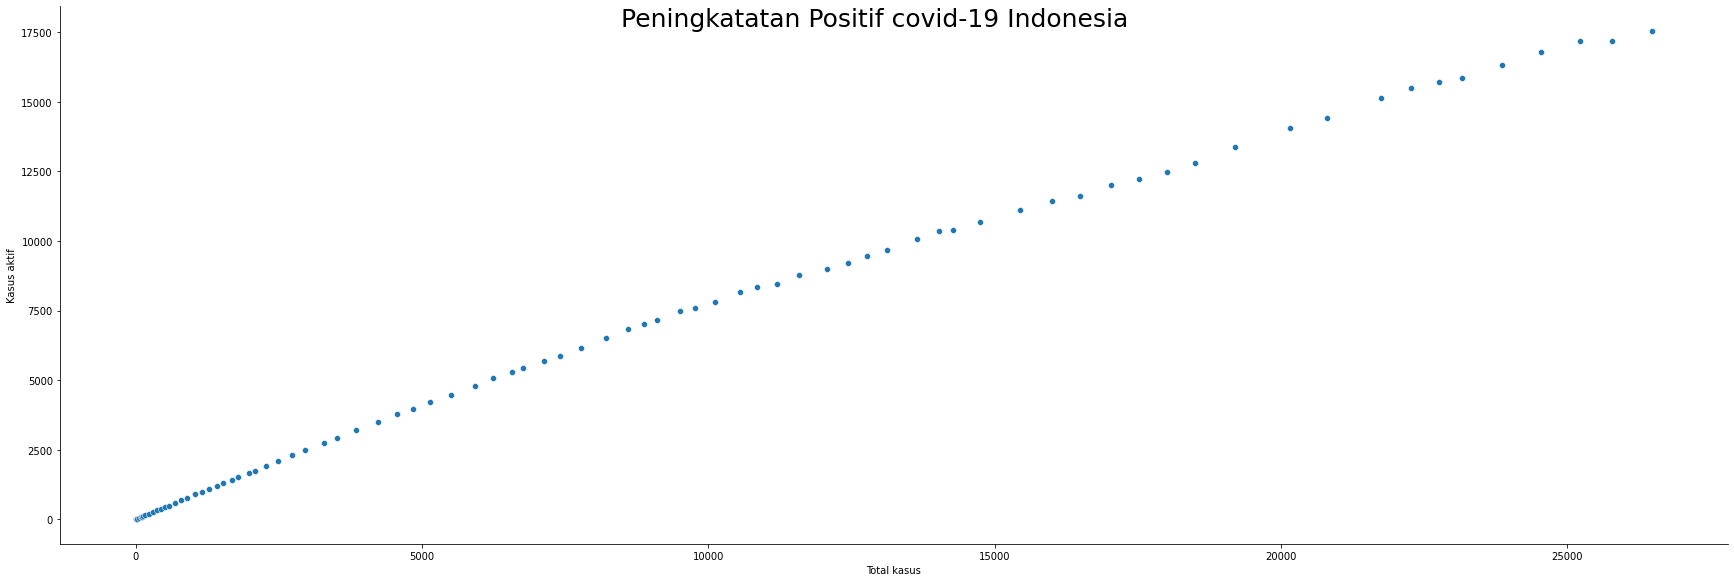

In [11]:
g = sns.relplot(x= "Total kasus", y ="Kasus aktif", data = data,
            height=8, # make the plot 5 units high
            aspect=3)
g.fig.suptitle('Peningkatatan Positif covid-19 Indonesia', fontsize=25)

Text(0.5, 0.98, 'Peningkatatan Kesembuhan covid-19 Indonesia')

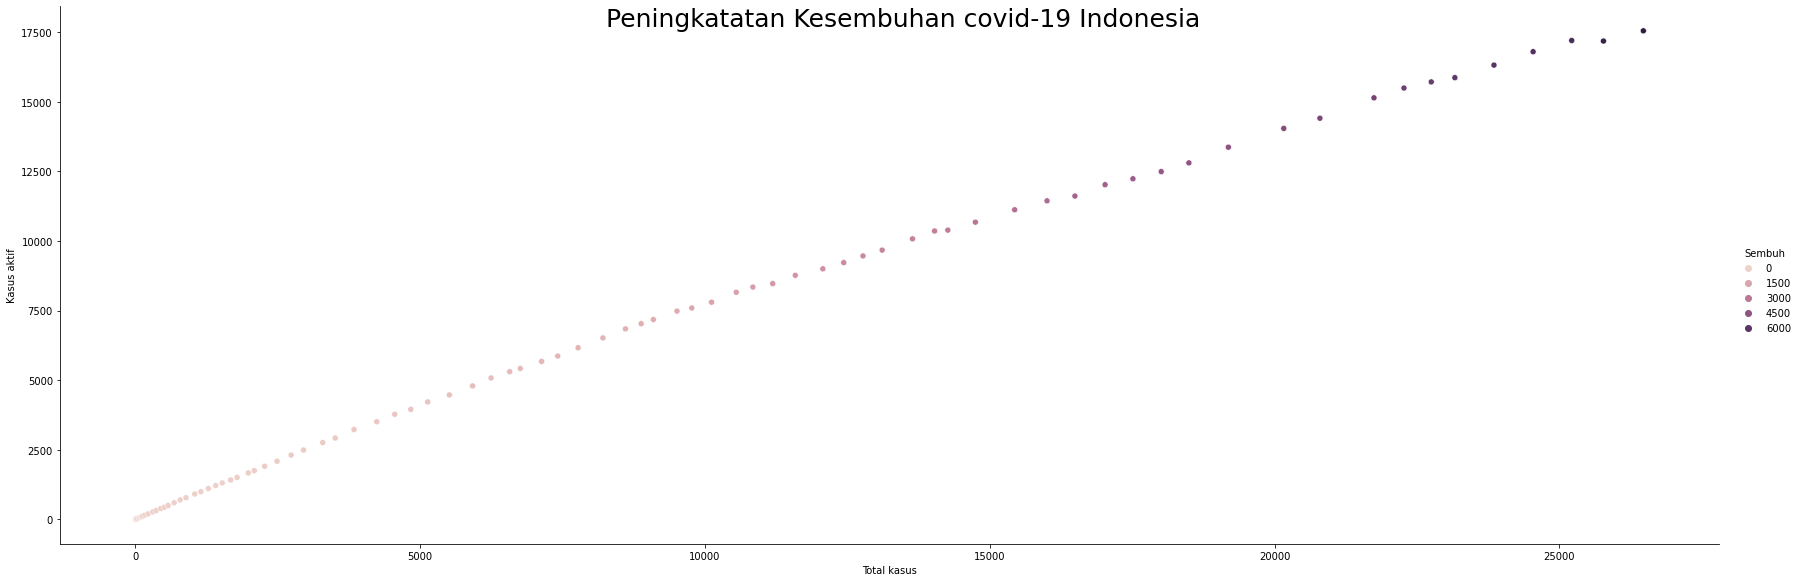

In [12]:
g = sns.relplot(x= "Total kasus", y ="Kasus aktif",hue ="Sembuh", data = data,
            height=8, # make the plot 5 units high
            aspect=3)
g.fig.suptitle('Peningkatatan Kesembuhan covid-19 Indonesia', fontsize=25)

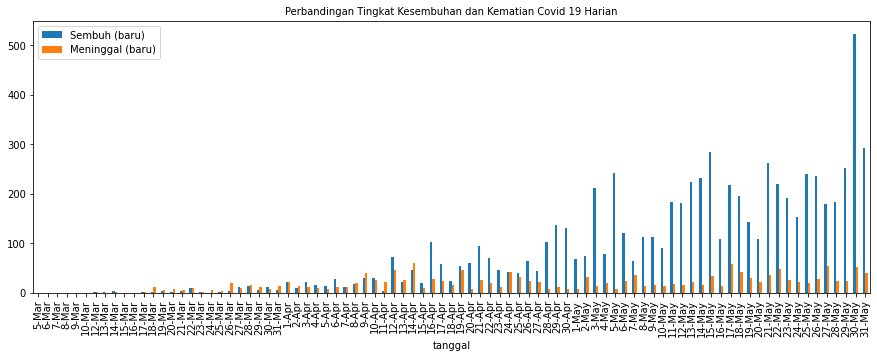

In [13]:
# plotting graph
plt.rcParams['figure.figsize'] = (15,5)
data.plot(x="tanggal", y=["Sembuh (baru)", "Meninggal (baru)"], kind="bar")
plt.title("Perbandingan Tingkat Kesembuhan dan Kematian Covid 19 Harian",fontsize = 10)
plt.show()

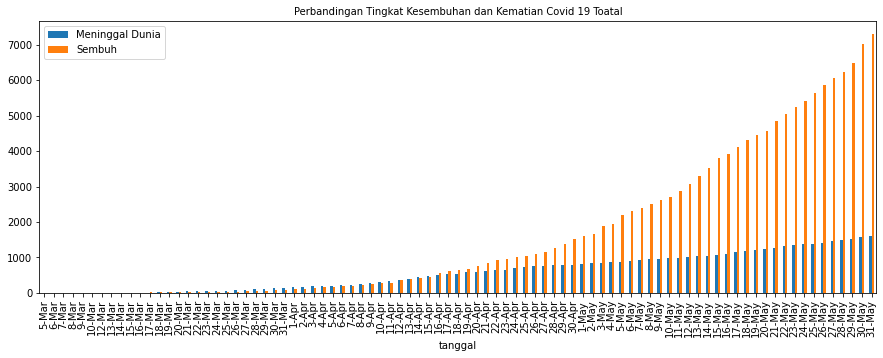

In [14]:
# plotting graph
plt.rcParams['figure.figsize'] = (15,5)
data.plot(x="tanggal", y=["Meninggal Dunia", "Sembuh"], kind="bar")
plt.title("Perbandingan Tingkat Kesembuhan dan Kematian Covid 19 Toatal",fontsize = 10)
plt.show()

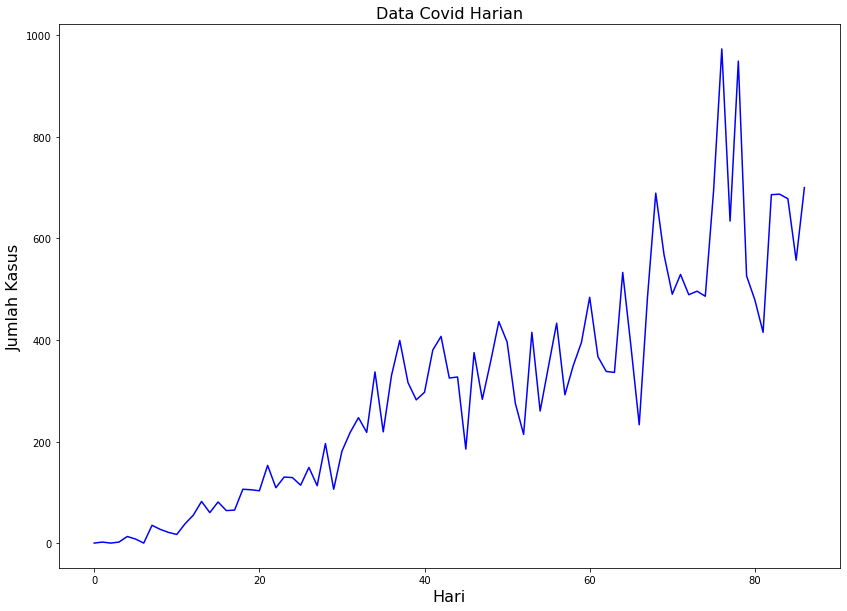

In [143]:
# Kolom 'Kasus Harian' yang akan kita gunakan dalam membangun model
# Slice kolom 'Kasus Harian' 

aktif = data.iloc[:,1:2].values
plt.figure(figsize=(14,10))                 
plt.plot(aktif,c="blue")
plt.title("Data Covid Harian",fontsize=16)
plt.xlabel("Hari",fontsize=16)
plt.ylabel("Jumlah Kasus",fontsize=16)
plt.show()

In [144]:
# Menskalakan data antara 1 dan 0 (scaling) pada low data

scaler = MinMaxScaler(feature_range=(0,1))
aktif_scaled = scaler.fit_transform(aktif)

In [145]:
# definisikan variabel step dan train 

step_size = 3                      

train_x = []
train_y = []

In [146]:
# membuat fitur dan lists label

for i in range(step_size,87):              
    train_x.append(aktif_scaled[i-step_size:i,0])
    train_y.append(aktif_scaled[i,0])

In [147]:
# mengonversi list yang telah dibuat sebelumnya ke array

train_x = np.array(train_x)                 
train_y = np.array(train_y)

In [148]:
# 47 hari terakhir akan digunakan dalam pengujian
# 40 hari pertama akan digunakan dalam pelatihan

test_x = train_x[47:]          
train_x = train_x[:47]          
test_y = train_y[47:]
train_y = train_y[:47]        

In [149]:
# reshape data untuk dimasukkan kedalam Keras model

train_x = np.reshape(train_x, (47, step_size, 1))           
test_x = np.reshape(test_x, (37, step_size, 1))

In [150]:
# buat varibel penampung model RNN
model = Sequential()

In [151]:
# Output dari SimpleRNN akan menjadi bentuk tensor 2D (batch_size, 40) dengan Dropout sebesar 0.15

model.add(SimpleRNN(40,activation="tanh",return_sequences=True, input_shape=(train_x.shape[1],1)))
model.add(Dropout(0.15))

model.add(SimpleRNN(50,activation="tanh",return_sequences=True))
model.add(Dropout(0.15))

model.add(SimpleRNN(40,activation="tanh",return_sequences=False))
model.add(Dropout(0.15))

# Add a Dense layer with 1 units.
model.add(Dense(units = 1))

In [152]:
# menambahkan loss function kedalam model RNN dengan tipe MSE

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [153]:
# fit the model RNN, dengan epoch 20 dan batch size 25

model.fit(train_x,train_y, epochs = 20, batch_size = 25)

Epoch 1/20
2/2 [==============================] - 1s 3ms/step - loss: 0.0670
Epoch 2/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0454
Epoch 3/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0230
Epoch 4/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0327
Epoch 5/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0095
Epoch 6/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0234
Epoch 7/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0267
Epoch 8/20
2/2 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 9/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0148
Epoch 10/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 11/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0203
Epoch 12/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0085
Epoch 13/20
2/2 [==============================] - 0s 3ms/step - loss: 0.

In [154]:
# Prediksi Model RNN
rnn_predictions = model.predict(test_x)

rnn_score = r2_score(test_y,rnn_predictions)

In [155]:
rnn_score

0.2154545396858416

In [156]:
# buat varibel penampung model LSTM
model1 = Sequential()

In [157]:
# Add a LSTM layer with 40 internal units. dengan Dropout sebesar 0.15

model1.add(LSTM(40,activation="tanh",return_sequences=True, input_shape=(train_x.shape[1],1)))
model1.add(Dropout(0.15))

model1.add(LSTM(40,activation="tanh",return_sequences=True))
model1.add(Dropout(0.15))

model1.add(LSTM(40,activation="tanh",return_sequences=False))
model1.add(Dropout(0.15))

# Add a Dense layer with 1 units.
model1.add(Dense(units = 1))

In [158]:
# menambahkan loss function kedalam model lstm dengan tipe MSE

model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [159]:
# fit lstm model, dengan epoch 20 dan batch size 25

model1.fit(train_x,train_y, epochs = 20, batch_size = 25)

Epoch 1/20
2/2 [==============================] - 5s 6ms/step - loss: 0.0484
Epoch 2/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0431
Epoch 3/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0382
Epoch 4/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0332
Epoch 5/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0279
Epoch 6/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0246
Epoch 7/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0209
Epoch 8/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0174
Epoch 9/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0161
Epoch 10/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0154
Epoch 11/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0155
Epoch 12/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0159
Epoch 13/20
2/2 [==============================] - 0s 5ms/step - loss: 0.

In [160]:
# Prediksi Model LSTM
lstm_predictions = model1.predict(test_x)

lstm_score = r2_score(test_y,lstm_predictions)

In [161]:
lstm_score

-1.7122150798167288

In [164]:
# Cetak nilai prediksi masing-masing model dengan menggunakan r^2 square

print('R^2 Score dari model RNN',rnn_score,'')
print('R^2 Score dari model LSTM',lstm_score,'')

R^2 Score dari model RNN 0.2154545396858416 
R^2 Score dari model LSTM -1.7122150798167288 


In [162]:
lstm_predictions = scaler.inverse_transform(lstm_predictions)
rnn_predictions = scaler.inverse_transform(rnn_predictions)
test_y = scaler.inverse_transform(test_y.reshape(-1,1))

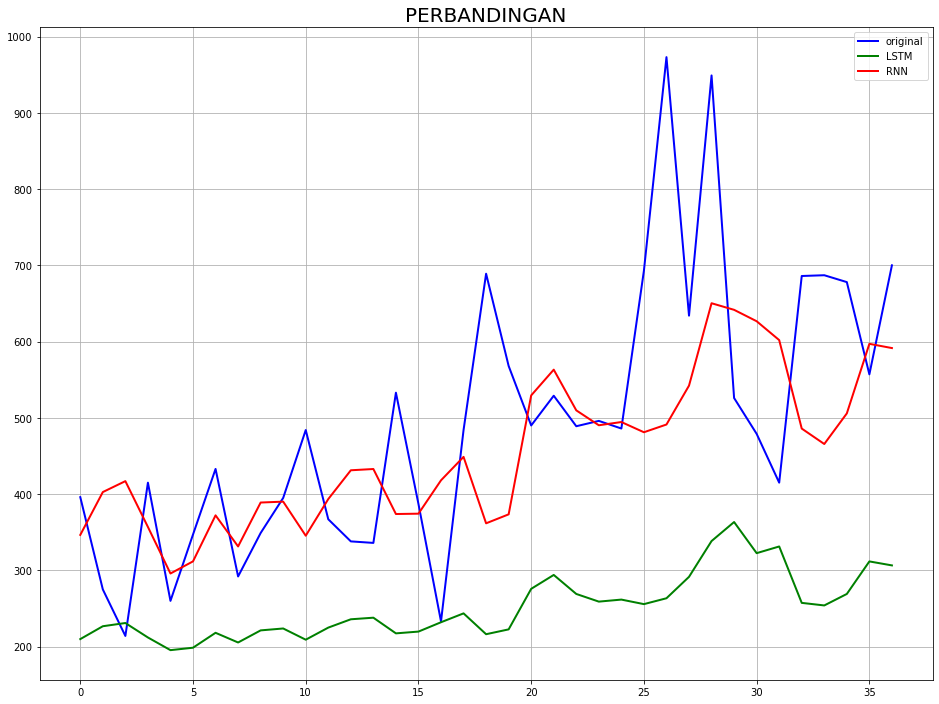

In [163]:
plt.figure(figsize=(16,12))

plt.plot(test_y, c="blue",linewidth=2, label="original")
plt.plot(lstm_predictions, c="green",linewidth=2, label="LSTM")
plt.plot(rnn_predictions, c="red",linewidth=2, label="RNN")
plt.legend()
plt.title("PERBANDINGAN",fontsize=20)
plt.grid()
plt.show()

In [ ]:
# Maka Metode RNN sedikit lebih baik dalam memprediksi jumlah kasus Covid ke depanya dibanding LSTM.